# Bussiness Problem : Loan Prediction

## Problem Statement

**Predict Loan Eligibility for Dream Housing Finance company**

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Data Collection

The data is collected from https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

## Data Dictionary

    Variable             -- -> Description
    Loan_ID              -- -> Unique Loan ID
    Gender               -- -> Male/ Female
    Married              -- -> Applicant married (Y/N)
    Dependents           -- -> Number of dependents
    Education            -- -> Applicant Education (Graduate/ Under Graduate)
    Self_Employed        -- -> Self employed (Y/N)
    ApplicantIncome      -- -> Applicant income
    CoapplicantIncome    -- -> Coapplicant income
    LoanAmount           -- -> Loan amount in thousands
    Loan_Amount_Term     -- -> Term of loan in months
    Credit_History       -- -> credit history meets guidelines
    Property_Area        -- -> Urban/ Semi Urban/ Rural
    Loan_Status          -- -> (Target) Loan approved (Y/N)

## Importing the Packages

In [2]:
# First import all the necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [3]:
loan=pd.read_csv(r'D:\Imarticus\Analytics Vidhya\Loan Prediction\train_ctrUa4K.csv') # Train file

In [4]:
loan.shape

(614, 13)

* **This dataset has 614 records/ rows and 13 columns.**

In [5]:
# Top 5 records of the dataset
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# We can drop Loan_ID because it is nominal data
# but later we need this to access the values, so we will not drop it.
# We will set Loan_ID as index

loan.set_index('Loan_ID',inplace=True)

## Information about the Dataset

In [7]:

loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


* **There are 7 catagorical variables**
    * Gender 
    * Married 
    * Dependents 
    * Education 
    * Self_Employed
    * Property_Area
    * Loan_Status
    
* **There are 5 numerical variables**
    * ApplicantIncome 
    * CoapplicantIncome 
    * LoanAmount
    * Loan_Amount_Term
    * Credit_History
* **There are some missing values in this dataset that need to be treated.**

## Exploratory Data Analysis

In [8]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


* **Describe method helps to see how data has spread for numerical values**.
* **We can see minimum value, mean valu, different percentile values and maximum value for each numerical feature.**

### Univariate Analysis

#### Catagorical Variables

In [9]:
# This function will return some basic information about the catagorical features like missing values, unique catagories and value counts etc.

def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"Percentage"},inplace=True)
    f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+" %"
    ff=pd.concat([f1,f2],axis=1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique category : {unique_cnt}\n")
    print(f"Unique categories : \n{unique_cat}")
    print(f"Value count and % : \n{ff}")
    
    sns.countplot(data=data,x=x)
    plt.show()

Total missing values : 13

Total count of unique category : 2

Unique categories : 
['Male', 'Female', nan]
Value count and % : 
        Count Percentage
Male      489    81.36 %
Female    112    18.64 %
NaN        13        NaN


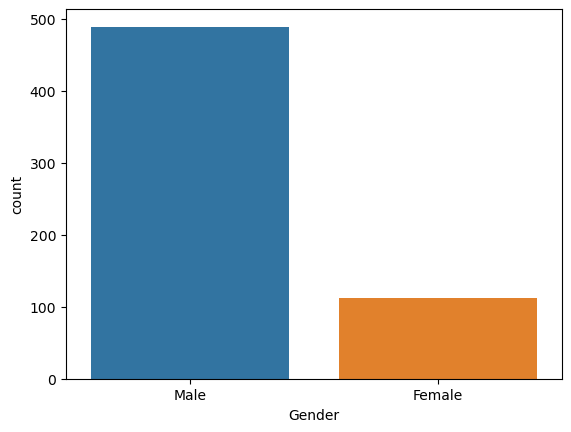

In [10]:
univariate_cat(loan,'Gender')

In [11]:
# To make Gender variable a numerical variable we will replace Male by 1 and Female by 0.
loan['Gender']=loan['Gender'].replace(['Male','Female'],[1,0])

Total missing values : 3

Total count of unique category : 2

Unique categories : 
['No', 'Yes', nan]
Value count and % : 
     Count Percentage
Yes    398    65.14 %
No     213    34.86 %
NaN      3        NaN


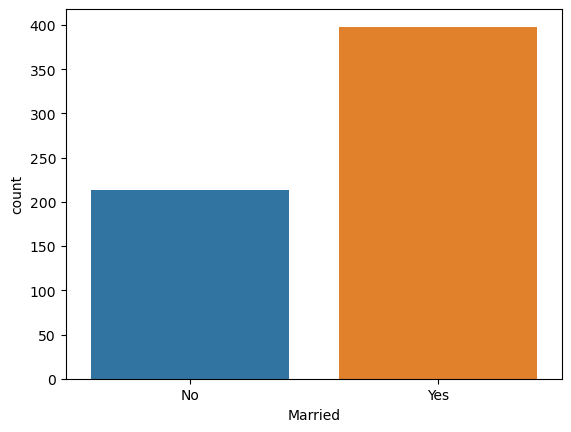

In [12]:
univariate_cat(loan,'Married')

In [13]:
# To make Married variable a numerical variable we will replace Yes by 1 and No by 0.
loan['Married']=loan['Married'].map({'Yes':1,'No':0})

Total missing values : 15

Total count of unique category : 4

Unique categories : 
['0', '1', '2', '3+', nan]
Value count and % : 
     Count Percentage
0      345     57.6 %
1      102    17.03 %
2      101    16.86 %
3+      51     8.51 %
NaN     15        NaN


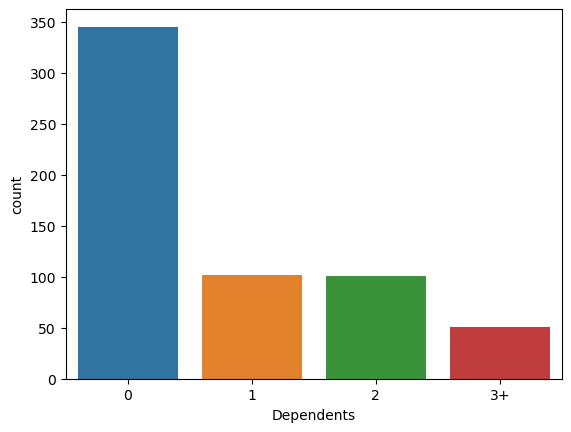

In [14]:
univariate_cat(loan,'Dependents')

In [15]:
# For the sake of simplicity we will be replacing 3+ with 3
loan['Dependents']=loan['Dependents'].replace('3+',3)

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Graduate', 'Not Graduate']
Value count and % : 
              Count Percentage
Graduate        480    78.18 %
Not Graduate    134    21.82 %


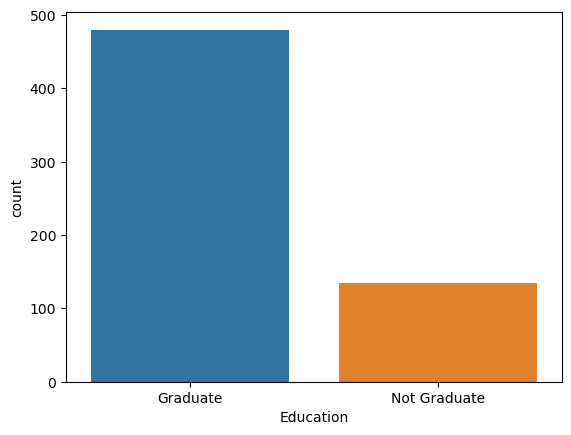

In [16]:
univariate_cat(loan,'Education')

In [17]:
# To make Education variable a numerical variable we will replace Graduate by 1 and Not Graduate by 0.
loan['Education']=np.where(loan['Education']=='Graduate',1,0)

Total missing values : 32

Total count of unique category : 2

Unique categories : 
['No', 'Yes', nan]
Value count and % : 
     Count Percentage
No     500    85.91 %
Yes     82    14.09 %
NaN     32        NaN


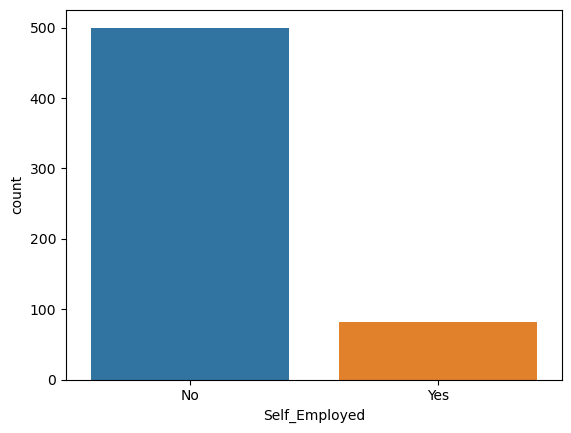

In [18]:
univariate_cat(loan,'Self_Employed')

In [19]:
# To make Gender variable a numerical variable we will replace Male by 1 and Female by 0.
loan['Self_Employed']=loan['Self_Employed'].replace(['Yes','No'],[1,0])

Total missing values : 0

Total count of unique category : 3

Unique categories : 
['Urban', 'Rural', 'Semiurban']
Value count and % : 
           Count Percentage
Semiurban    233    37.95 %
Urban        202     32.9 %
Rural        179    29.15 %


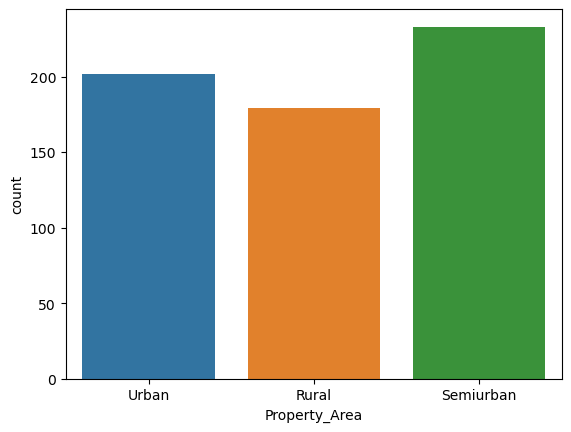

In [20]:
univariate_cat(loan,'Property_Area')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Y', 'N']
Value count and % : 
   Count Percentage
Y    422    68.73 %
N    192    31.27 %


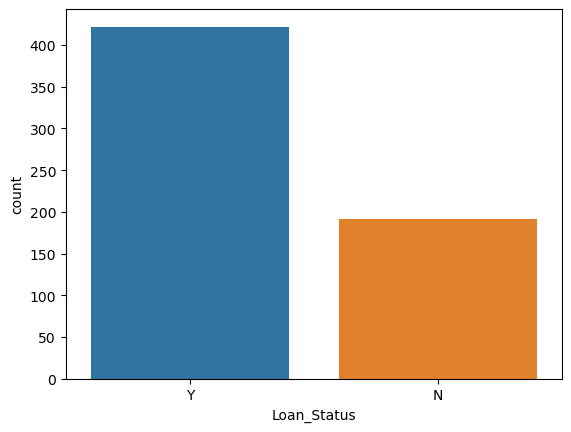

In [21]:
univariate_cat(loan,'Loan_Status')

In [22]:
# To make Loan_Status variable a numerical variable we will replace Y by 1 and N by 0.
loan['Loan_Status']=np.where(loan['Loan_Status']=='Y',1,0)

Total missing values : 50

Total count of unique category : 2

Unique categories : 
[1.0, 0.0, nan]
Value count and % : 
     Count Percentage
1.0    475    84.22 %
0.0     89    15.78 %
NaN     50        NaN


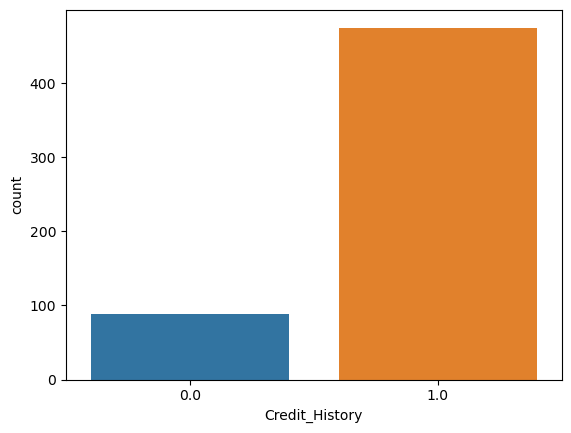

In [23]:
univariate_cat(loan,'Credit_History')

#### Numerical Variables

In [24]:
# This function will return some basic information about the numerical features like min, max, variance, standard deviation, range, quantiles and ome plots etc.

def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean=round(data[x].mean(),2)
    var=round(data[x].var(),2)
    std=round(data[x].std(),2)
    range1=round(max1-min1,2)
    q1=round(data[x].quantile(.25),2)
    q2=round(data[x].quantile(.50),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)
    myvalue={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std,"range" : range1,
             "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data,y=data[x])
    plt.show()
    return myvalue

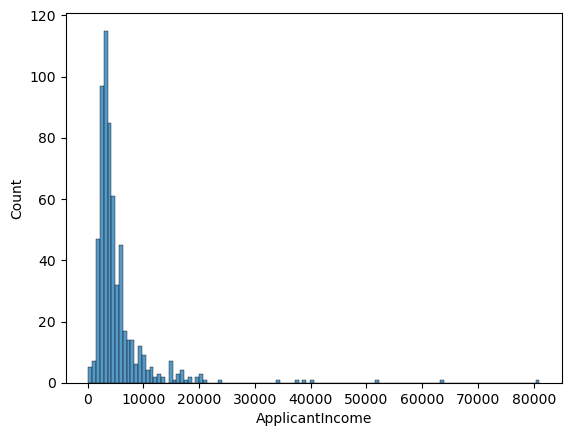

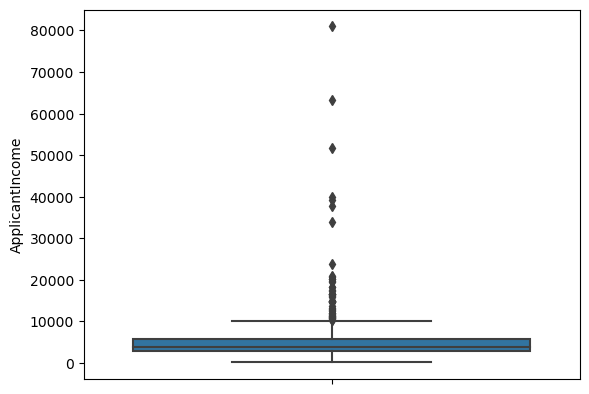

{'missing': 0,
 'min': 150,
 'max': 81000,
 'mean': 5403.46,
 'var': 37320390.17,
 'std': 6109.04,
 'range': 80850,
 'q1': 2877.5,
 'q2': 3812.5,
 'q3': 5795.0,
 'skewness': 6.54,
 'Kurtosis': 60.54}

In [25]:
univariate_num(loan,'ApplicantIncome')

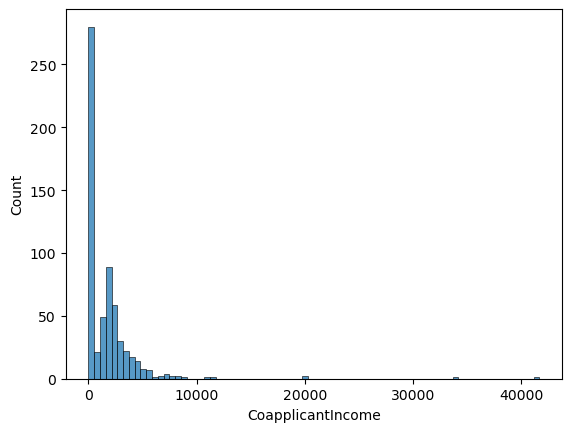

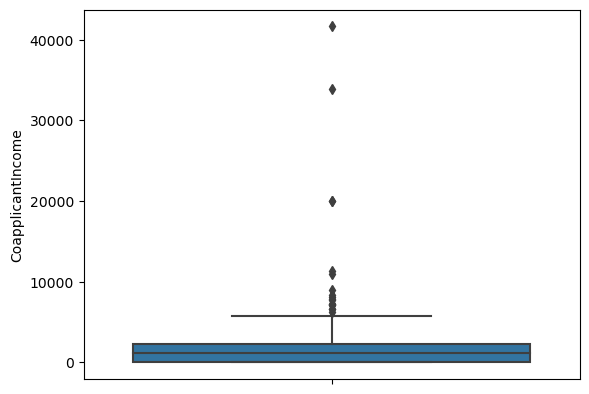

{'missing': 0,
 'min': 0.0,
 'max': 41667.0,
 'mean': 1621.25,
 'var': 8562929.52,
 'std': 2926.25,
 'range': 41667.0,
 'q1': 0.0,
 'q2': 1188.5,
 'q3': 2297.25,
 'skewness': 7.49,
 'Kurtosis': 84.96}

In [26]:
univariate_num(loan,'CoapplicantIncome')

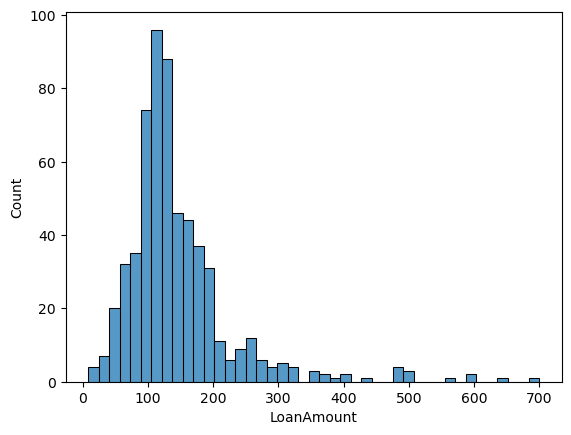

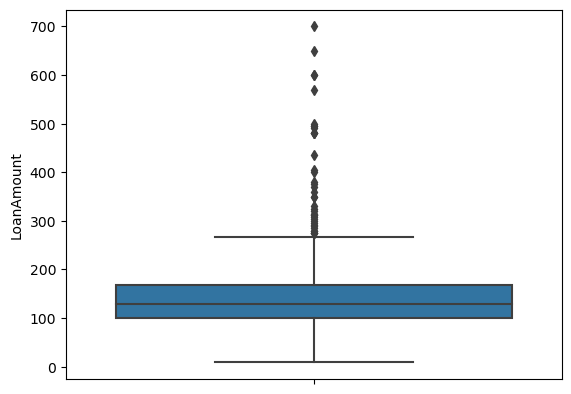

{'missing': 22,
 'min': 9.0,
 'max': 700.0,
 'mean': 146.41,
 'var': 7325.19,
 'std': 85.59,
 'range': 691.0,
 'q1': 100.0,
 'q2': 128.0,
 'q3': 168.0,
 'skewness': 2.68,
 'Kurtosis': 10.4}

In [27]:
univariate_num(loan,'LoanAmount')

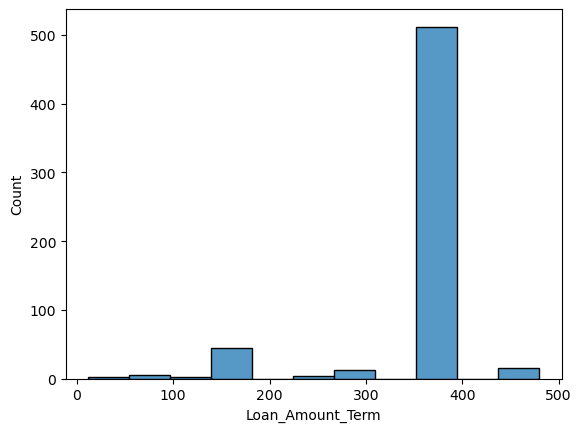

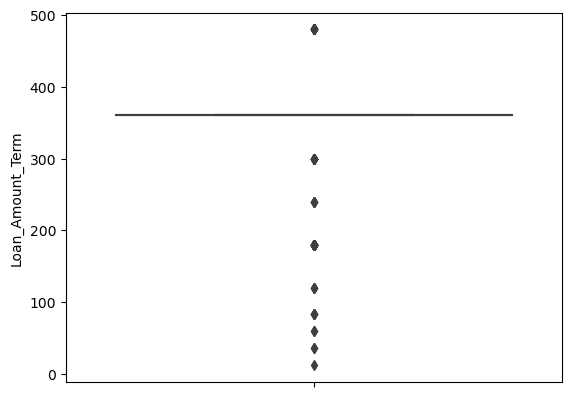

{'missing': 14,
 'min': 12.0,
 'max': 480.0,
 'mean': 342.0,
 'var': 4240.67,
 'std': 65.12,
 'range': 468.0,
 'q1': 360.0,
 'q2': 360.0,
 'q3': 360.0,
 'skewness': -2.36,
 'Kurtosis': 6.67}

In [28]:
univariate_num(loan,'Loan_Amount_Term')

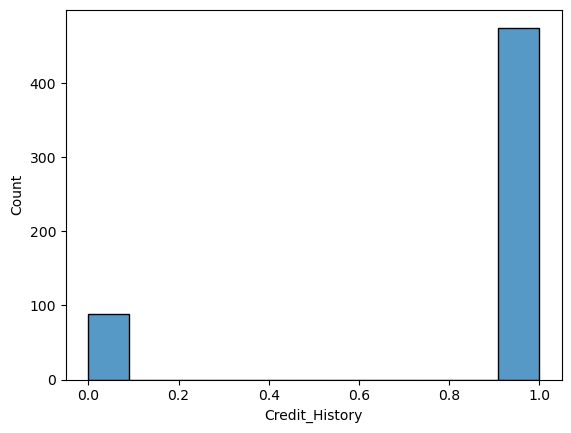

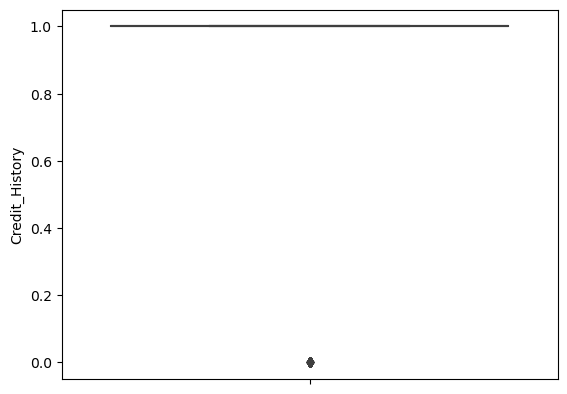

{'missing': 50,
 'min': 0.0,
 'max': 1.0,
 'mean': 0.84,
 'var': 0.13,
 'std': 0.36,
 'range': 1.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': -1.88,
 'Kurtosis': 1.55}

In [29]:
univariate_num(loan,'Credit_History')

* **All the numerical variables have outliers.**

### Bivariate Analysis

#### Cat-Cat

<AxesSubplot:xlabel='Loan_Status'>

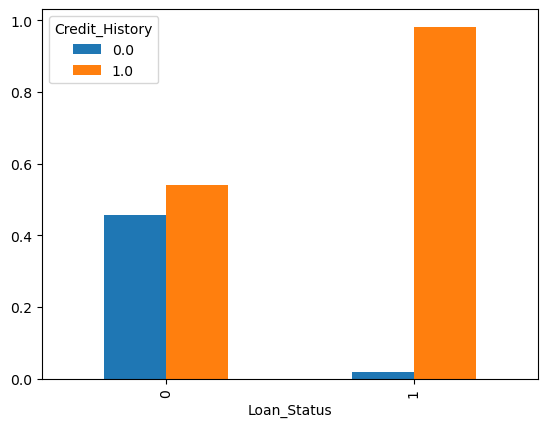

In [30]:
pd.crosstab(loan['Loan_Status'],loan['Credit_History'],normalize='index').plot(kind='bar')

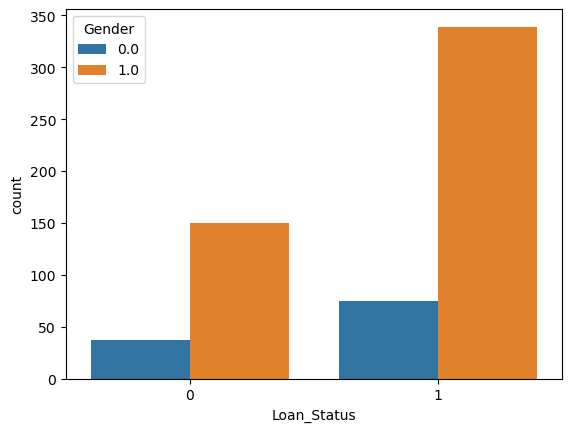

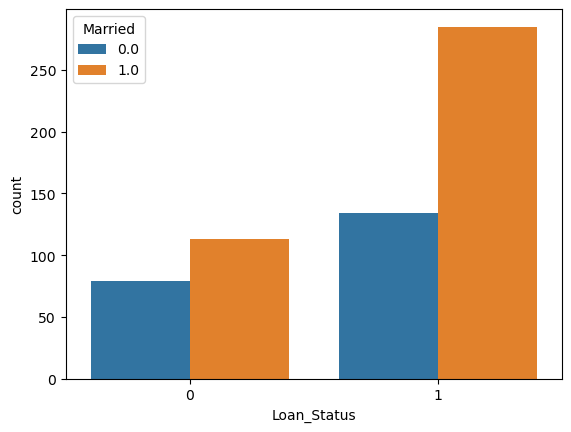

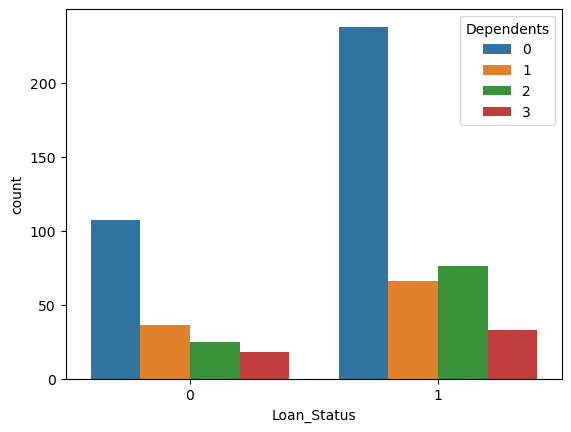

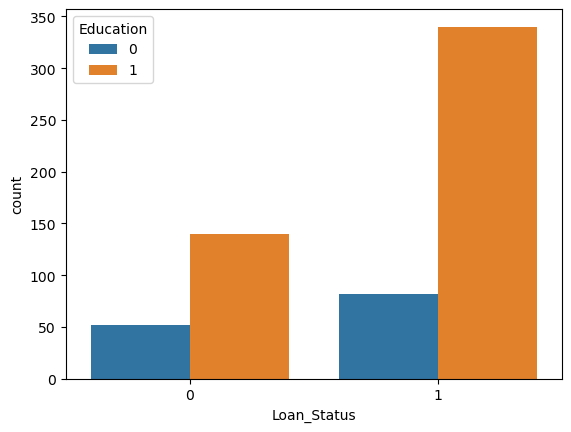

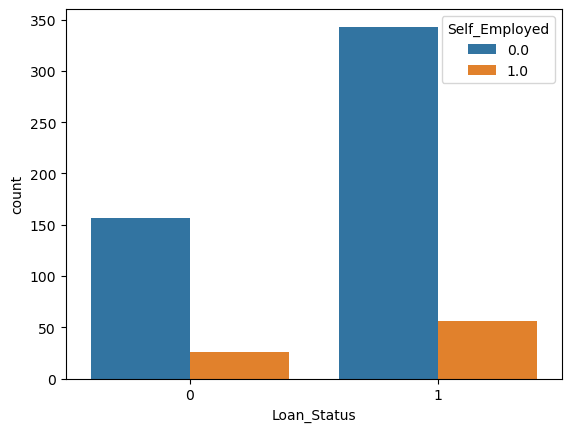

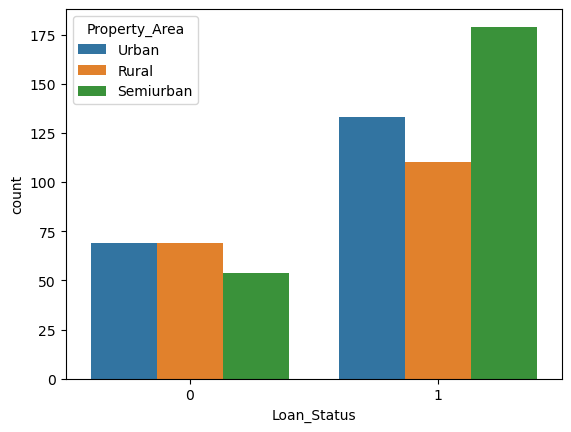

In [31]:
l=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']
for i in l:
    sns.countplot(data=loan, x='Loan_Status', hue=loan[i])
    plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

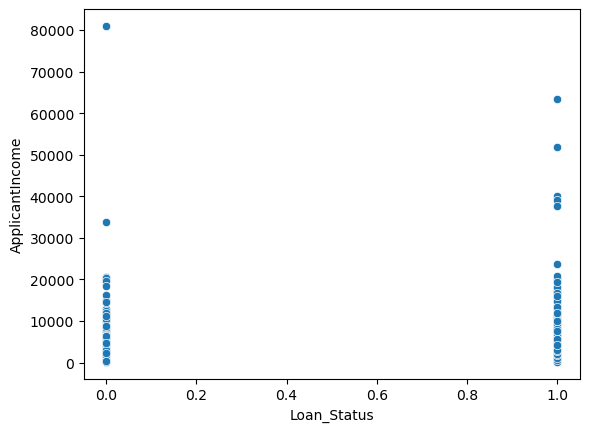

In [32]:
sns.scatterplot(data=loan, x='Loan_Status', y='ApplicantIncome')

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

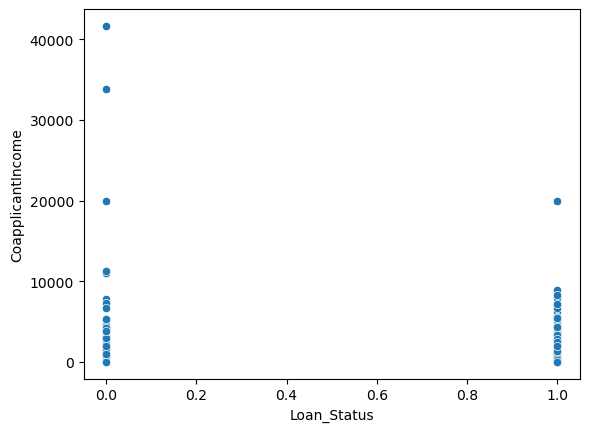

In [33]:
sns.scatterplot(data=loan, x='Loan_Status', y='CoapplicantIncome')

<AxesSubplot:xlabel='Dependents'>

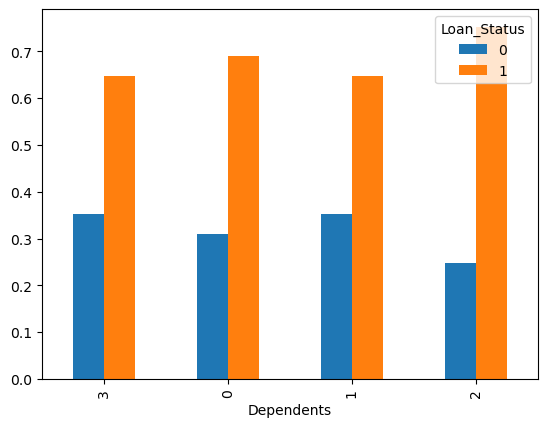

In [34]:
pd.crosstab(loan['Dependents'],loan['Loan_Status'],normalize='index').plot(kind='bar')

<AxesSubplot:xlabel='Loan_Status'>

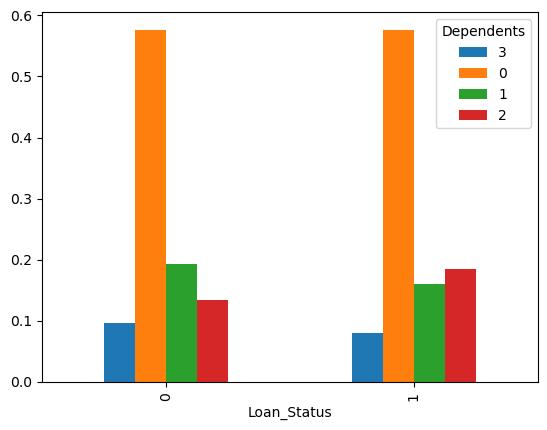

In [35]:
pd.crosstab(loan['Loan_Status'],loan['Dependents'],normalize='index').plot(kind='bar')

## Feature Engineering

* **Make another column as Total Income using Applicant Income and Coapplicant income to check the how total income affect loan status.
Main reason of doing this is that there are alot of applicant that does not have coapplicant and there value is zero.**

In [36]:
loan['total_income']=loan['ApplicantIncome']+loan['CoapplicantIncome']

<AxesSubplot:xlabel='ApplicantIncome', ylabel='total_income'>

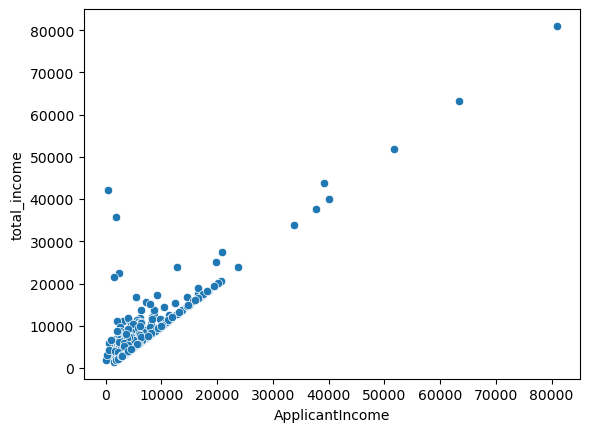

In [37]:
sns.scatterplot(data=loan, x='ApplicantIncome', y='total_income')

## Missing Value Treatment

In [38]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
total_income          0
dtype: int64

In [39]:
# To show missing value in a Data Frame with Null Values and percentage
pd.DataFrame({'Null Values':loan.isnull().sum(),'Percentage':round((loan.isnull().sum()/loan.shape[0]),2)})

,Null Values,Percentage
Gender,13,0.02
Married,3,0.00
Dependents,15,0.02
Education,0,0.00
Self_Employed,32,0.05
ApplicantIncome,0,0.00
CoapplicantIncome,0,0.00
LoanAmount,22,0.04
Loan_Amount_Term,14,0.02
Credit_History,50,0.08


* **There are some variables where values are missing.**<br>
Gender - 13<br>
Married - 3<br>
Self_Employed - 32<br>
LoanAmount - 22<br>
Loan_Amount_Term - 14<br>
Credit_History - 50<br>
* **So We will fill numarical variable values with median or mode of each variable and objective variables with mode.**

### Imputing Mode in place of Null values in Catagorical Variable

In [40]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)

In [41]:
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)

In [42]:
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)

In [43]:
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)

In [44]:
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)

In [45]:
loan['Dependents']=loan['Dependents'].astype('int')

### Imputing Median or Mode in place of Null values in Numerical Variable

* **First we will fill Median and Mean both in numarical variable and see what difference it will make on variance.**

In [46]:
# We will use a copy of data so that any changes do not reflect on original data.
data=loan.copy()

In [47]:
data['LoanAmountMedian']=data['LoanAmount'].fillna(loan['LoanAmount'].median())
data['LoanAmountMean']=data['LoanAmount'].fillna(loan['LoanAmount'].mean())

In [48]:
data['Loan_Amount_TermMedian']=data['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median())
data['Loan_Amount_TermMean']=data['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())

In [49]:
print('Origional Loan Amount', data['LoanAmount'].var())
print('Mean Loan Amount', data['LoanAmountMean'].var())
print('Median Loan Amount', data['LoanAmountMedian'].var())

Origional Loan Amount 7325.190241002424
Mean Loan Amount 7062.295974604296
Median Loan Amount 7074.026706909471


In [50]:
print('Origional Loan_Amount_Term', data['Loan_Amount_Term'].var())
print('Mean Loan_Amount_Term', data['Loan_Amount_TermMean'].var())
print('Median Loan_Amount_Termt', data['Loan_Amount_TermMedian'].var())

Origional Loan_Amount_Term 4240.667779632721
Mean Loan_Amount_Term 4143.817292006525
Median Loan_Amount_Termt 4151.048243539801


* **Graphical Analysis after Imputation**

<AxesSubplot:ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

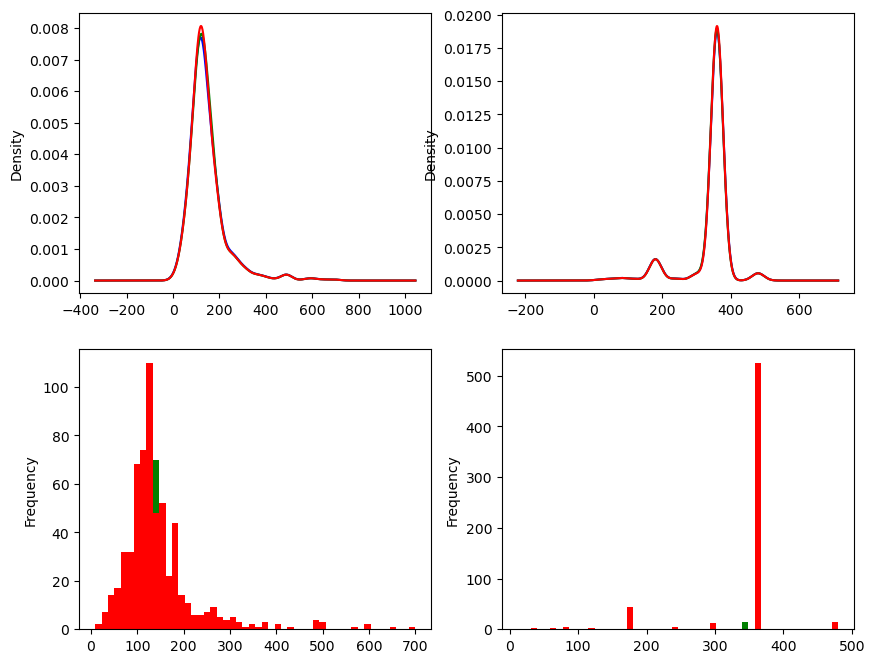

In [51]:
# Using Density plot from seaborn library 

fig=plt.figure()
fig,axs=plt.subplots(2,2, figsize=(10,8))

data['LoanAmount'].plot.density(color='blue', ax=axs[0, 0], label='Loan amount')
data['LoanAmountMean'].plot.density(color='green', ax=axs[0, 0], label='Loan amount Mean')
data['LoanAmountMedian'].plot.density(color='red', ax=axs[0, 0], label='Loan amount Median')

data['Loan_Amount_Term'].plot.density(color='blue', ax=axs[0, 1], label='Loan_Amount_Term')
data['Loan_Amount_TermMean'].plot.density(color='green', ax=axs[0, 1], label='Loan_Amount_Term Mean')
data['Loan_Amount_TermMedian'].plot.density(color='red', ax=axs[0, 1], label='Loan_Amount_Term Median')

data['LoanAmount'].plot.hist(bins=50, color='blue', ax=axs[1, 0], label='Loan amount')
data['LoanAmountMean'].plot.hist(bins=50, color='green', ax=axs[1, 0], label='Loan amount Mean')
data['LoanAmountMedian'].plot.hist(bins=50, color='red', ax=axs[1, 0], label='Loan amount Median')

data['Loan_Amount_Term'].plot.hist(bins=50, color='blue', ax=axs[1, 1], label='Loan_Amount_Term')
data['Loan_Amount_TermMean'].plot.hist(bins=50, color='green', ax=axs[1, 1], label='Loan_Amount_Term Mean')
data['Loan_Amount_TermMedian'].plot.hist(bins=50, color='red', ax=axs[1, 1], label='Loan_Amount_Term Median')

* **As we can see Mean Median Imputation have not changed our distribution. So we can go with this technique and fill any mean or median. I will use Median to fill the missing values.**

In [52]:
loan['LoanAmount'].fillna(loan['LoanAmount'].median(),inplace=True)

In [53]:
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median(),inplace=True)

In [54]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
total_income         0
dtype: int64

## Outlier Treatment

In [55]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
 12  total_income       614 non-null    float64
dtypes: float64(8), int32(3), int64(1), object(1)
memory usage: 76.1+ KB


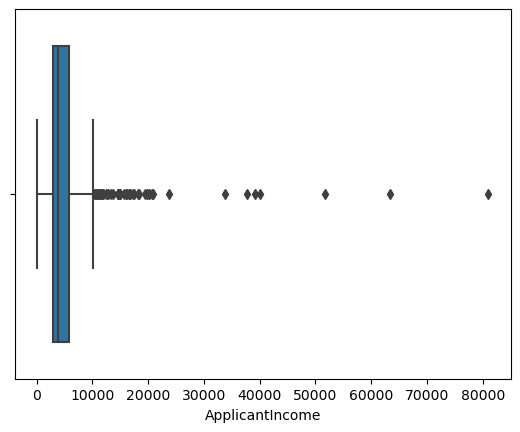

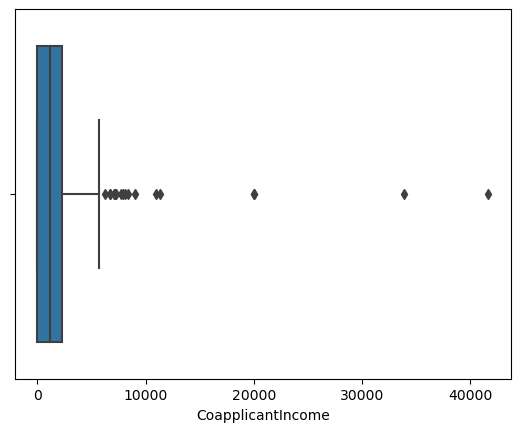

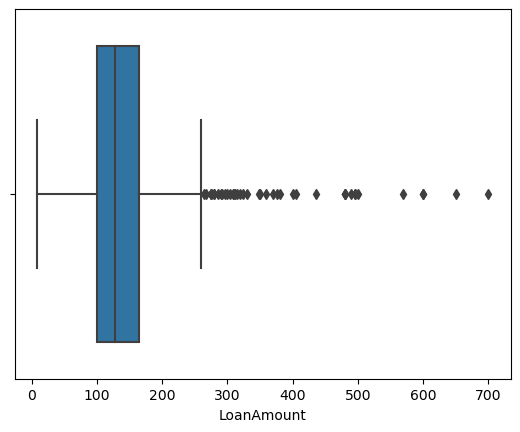

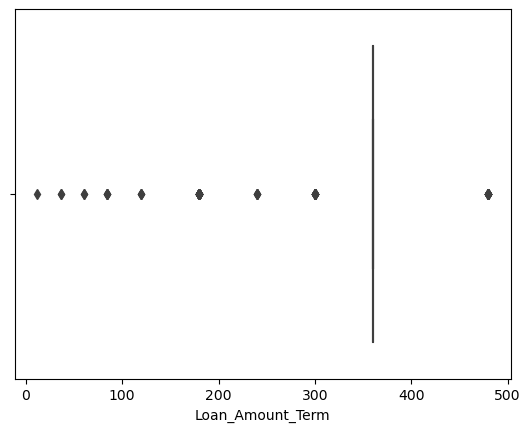

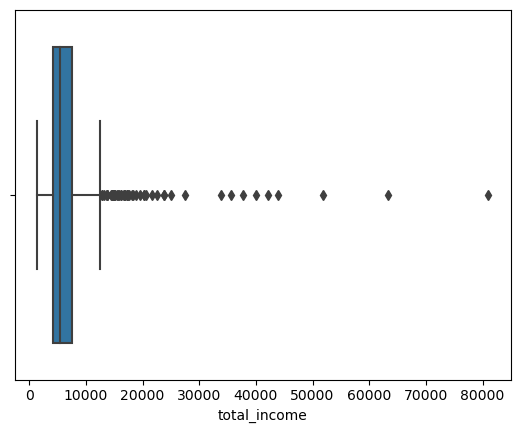

In [56]:
# Checking outliers in all numerical variables using box plot or Interquartile Method (IQR)

lst=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'total_income']
for i in lst:
    sns.boxplot(data=loan, x=loan[i])
    plt.show()

* **All the features/ variables have outliers but let us check the same with percentile method.**

In [57]:
o=loan.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T
o

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Gender,614.0,0.817590,0.386497,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,1.00,2.0,3.0,3.00,3.00,3.00,3.00,3.0
Education,614.0,0.781759,0.413389,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.00,1554.12,1800.00,1829.04,1897.55,2216.1,2877.50,3812.5,5795.00,9459.9,14583.0,15364.32,16682.25,19666.04,32540.41,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1188.5,2297.25,3782.2,4997.4,5397.04,5682.67,7198.56,8895.89,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,30.65,44.00,48.78,54.52,57.30,72.3,100.25,128.0,164.75,229.4,293.4,313.44,356.10,427.94,495.87,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,84.00,180.00,180.00,180.00,180.00,300.0,360.00,360.0,360.00,360.0,360.0,360.00,360.00,480.00,480.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0


* **The features ApplicantIncome, CoapplicantIncome, Loan Amount, total_income. So, we will treat them with Interquartile Method (IQR).**

In [58]:
# Interquartile Method (IQR) to remove outliers.
def remove_outlier_iqr(data,col):
    q1=data[col].quantile(.25)
    q3=data[col].quantile(.75)
    lower_cap=q1-1.5*(q3-q1)
    upper_cap=q3+1.5*(q3-q1)
    data[col]=np.where(data[col]>=upper_cap, upper_cap, data[col])
    data[col]=np.where(data[col]<=lower_cap, lower_cap, data[col])
    print('Upper Cap :',upper_cap)
    print('Lower Cap :',lower_cap)

In [59]:
remove_outlier_iqr(loan,'ApplicantIncome')

Upper Cap : 10171.25
Lower Cap : -1498.75


In [60]:
remove_outlier_iqr(loan,'CoapplicantIncome')

Upper Cap : 5743.125
Lower Cap : -3445.875


In [61]:
remove_outlier_iqr(loan,'LoanAmount')

Upper Cap : 261.5
Lower Cap : 3.5


In [62]:
remove_outlier_iqr(loan,'Loan_Amount_Term')

Upper Cap : 360.0
Lower Cap : 360.0


In [63]:
remove_outlier_iqr(loan,'total_income')

Upper Cap : 12555.375
Lower Cap : -867.625


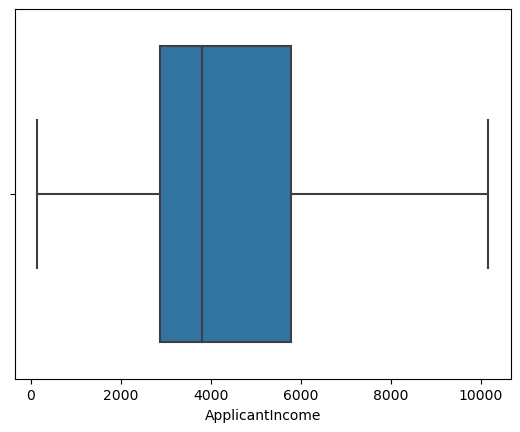

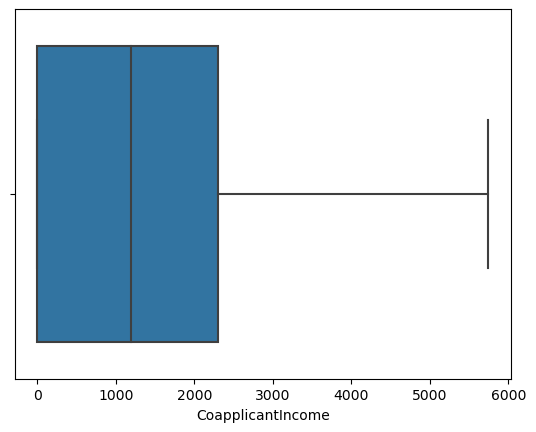

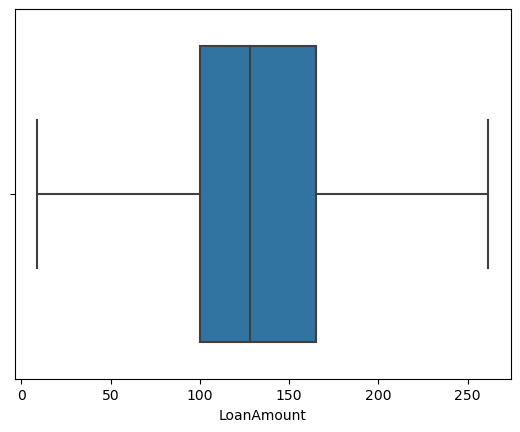

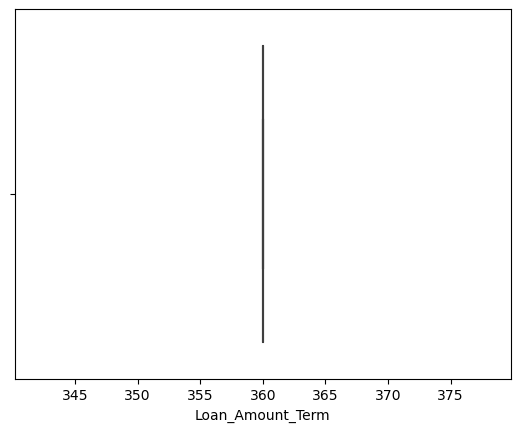

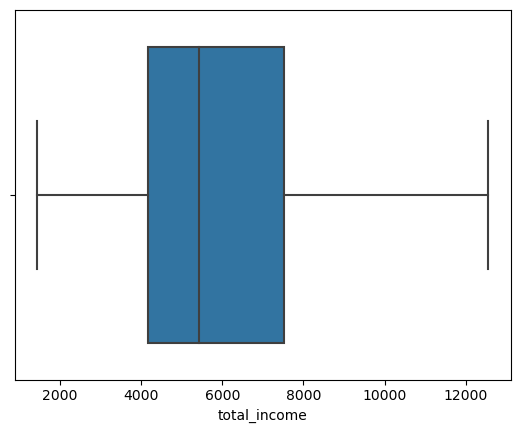

In [64]:
lst=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'total_income']
for i in lst:
    sns.boxplot(data=loan, x=loan[i])
    plt.show()

In [65]:
data.skew() 

C:\Users\ABHAY\AppData\Local\Temp\ipykernel_5432\3483820552.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Gender                   -1.648795
Married                  -0.644850
Dependents                1.015551
Education                -1.367622
Self_Employed             2.159796
ApplicantIncome           6.539513
CoapplicantIncome         7.491531
LoanAmount                2.677552
Loan_Amount_Term         -2.362414
Credit_History           -2.021971
Loan_Status              -0.809998
total_income              5.633449
LoanAmountMedian          2.743053
LoanAmountMean            2.726601
Loan_Amount_TermMedian   -2.402112
Loan_Amount_TermMean     -2.389680
dtype: float64

In [66]:
loan.skew()

C:\Users\ABHAY\AppData\Local\Temp\ipykernel_5432\2901885952.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loan.skew()


Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.683693
Loan_Amount_Term     0.000000
Credit_History      -2.021971
Loan_Status         -0.809998
total_income         0.942823
dtype: float64

* **Skewness is reduced after we removed the outliers using IQR Method.**

## Converting non numeric to numeric

In [67]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
 12  total_income       614 non-null    float64
dtypes: float64(9), int32(3), object(1)
memory usage: 76.1+ KB


* **Property_Area is non numeric feature. So we will convert it to numeric by dummy creation method.**

## Dummy Creation

In [68]:
loan=pd.get_dummies(data=loan, drop_first=True)

In [69]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,total_income,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,
LP001002,1.0,0.0,0,1,0.0,5849.0,0.0,128.0,360.0,1.0,1,5849.0,0,1
LP001003,1.0,1.0,1,1,0.0,4583.0,1508.0,128.0,360.0,1.0,0,6091.0,0,0
LP001005,1.0,1.0,0,1,1.0,3000.0,0.0,66.0,360.0,1.0,1,3000.0,0,1
LP001006,1.0,1.0,0,0,0.0,2583.0,2358.0,120.0,360.0,1.0,1,4941.0,0,1
LP001008,1.0,0.0,0,1,0.0,6000.0,0.0,141.0,360.0,1.0,1,6000.0,0,1


### Multicollinearity

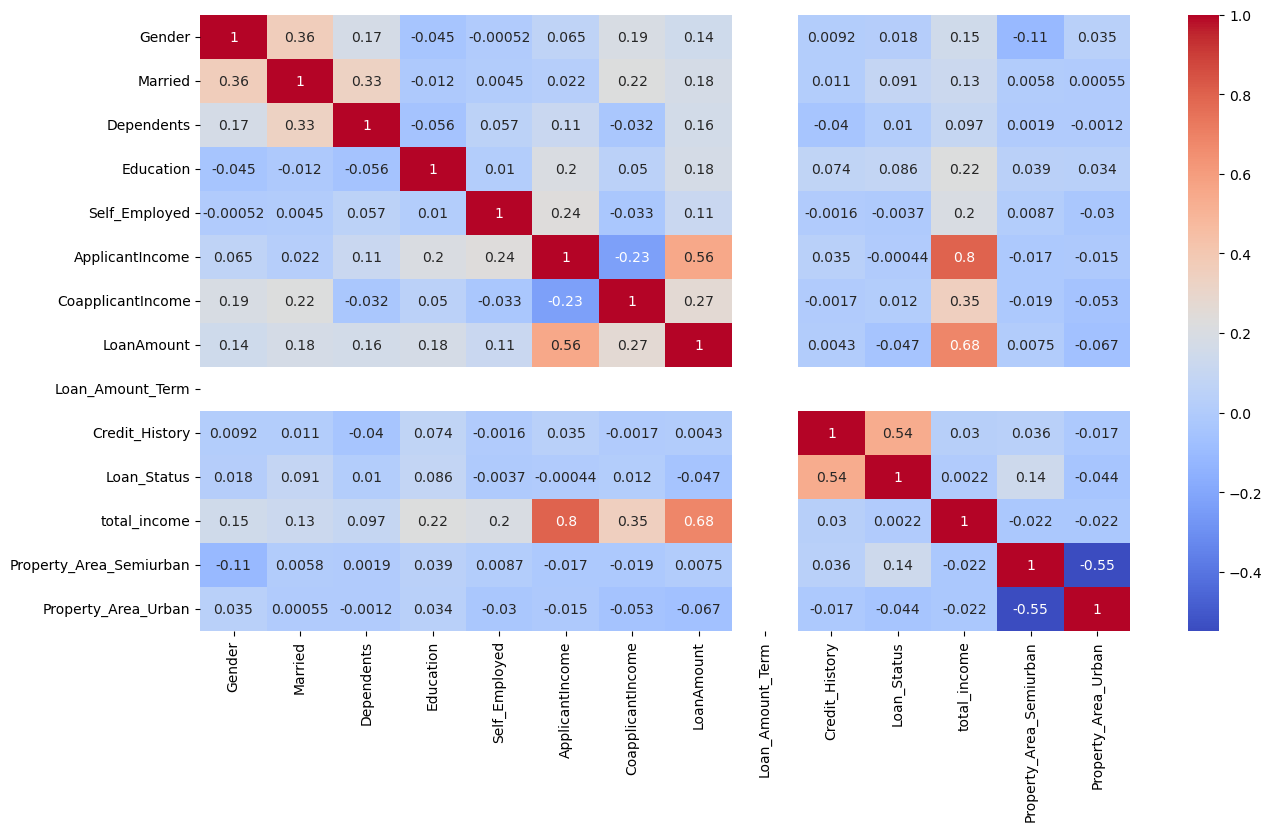

In [70]:
# Correlation between variables
cr=loan.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=cr, annot=True, cmap='coolwarm')
plt.show()

* **Applicantincome and total_income are highly correlated.**

## Model Development

In [71]:
# Importing required packages

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Assigning features and target variable

In [72]:
# Features
X=loan.drop(columns=['Loan_Status'])
# Target Variable
y=loan['Loan_Status']

### Train Test Split

In [73]:
# We will now split the data into Train data and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [74]:
X_train.shape, y_train.shape

((429, 13), (429,))

In [75]:
X_test.shape, y_test.shape

((185, 13), (185,))

### Standardizing or Feature Scaling

In [76]:
# Initialising
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.fit_transform(X_test)

### Logistic Regression

In [77]:
# Logistic Regression initialising

logR=LogisticRegression(max_iter=1000)
logR.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

In [78]:
# Checking the accuracy of the model

print('Train Accuracy :', logR.score(X_train_std, y_train))
print('Test Accuracy :', logR.score(X_test_std, y_test))

Train Accuracy : 0.8018648018648019
Test Accuracy : 0.8216216216216217


#### Predicting the Train and Test data results

In [79]:
pred_test = logR.predict(X_test_std)
pred_train = logR.predict(X_train_std)

<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

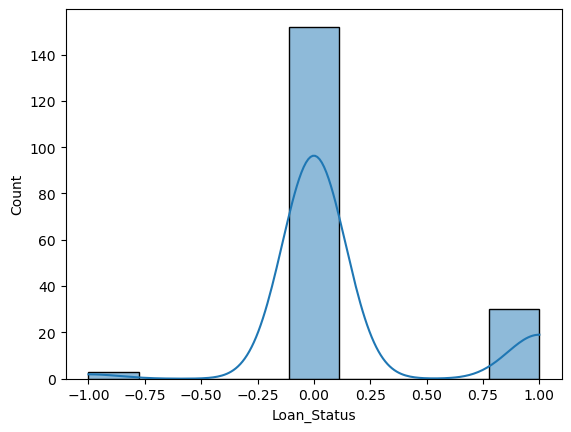

In [80]:
sns.histplot(pred_test-y_test, kde=True)

#### Accuracy of Logistic Regression

In [81]:
print('The Accuracy of Logistic Regression is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of Logistic Regression is  0.8216216216216217


#### Comparing actual test value with predicted test value

In [82]:
act_test_pred=pd.DataFrame({'Act': y_test,'Pred': pred_test})
# Showing 10 random sample
act_test_pred.sample(10)

,Act,Pred
Loan_ID,,
LP001013,1,1
LP001750,1,1
LP001222,0,0
LP001207,0,0
LP002300,1,1
LP002314,1,1
LP001708,0,1
LP001792,1,1
LP002345,1,1


#### Model Evolution

#### Confusion Metrix

In [83]:
conf_test=metrics.confusion_matrix(y_test,pred_test)
conf_test

array([[ 21,  30],
       [  3, 131]], dtype=int64)

In [84]:
pd.DataFrame(conf_test, columns=['Pred_0_neg','Pred_1_pos'], index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,21,30
Act_1_pos,3,131


#### Classification Report 

In [85]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185



In [86]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       141
           1       0.78      0.98      0.87       288

    accuracy                           0.80       429
   macro avg       0.85      0.71      0.73       429
weighted avg       0.83      0.80      0.78       429



* **Using Logistic Regression the recall value and it underfits the result.**

#### ROC and AUC

In [87]:
fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)    # AUC : Area under the curve
roc_auc

0.7076315011820331

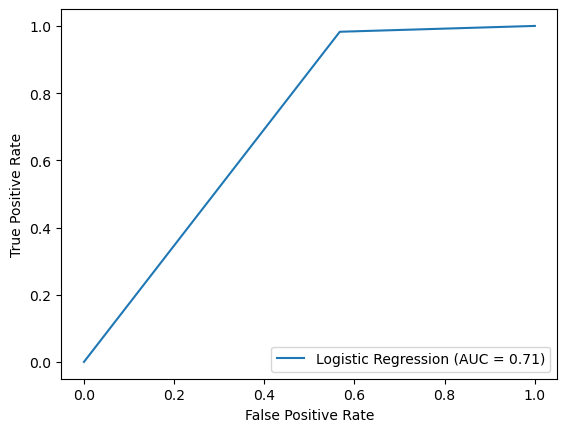

In [88]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

### K-NN

In [89]:
# Initialising the K-NN
knn1=KNeighborsClassifier()
knn1.fit(X_train_std, y_train)

KNeighborsClassifier()

In [90]:
# Checking the accuracy of the model

print('Train Accuracy :', knn1.score(X_train_std, y_train))
print('Test Accuracy :', knn1.score(X_test_std, y_test))

Train Accuracy : 0.8018648018648019
Test Accuracy : 0.7891891891891892


* **Now we will check if tuning the hypermeters give better result.**

In [91]:
k1=[3,5,7,9,11,13,15,17,19,21]
p=[1,2,3]

train=[]
test=[]

for i in k1:
    for j in p:
        knn2=KNeighborsClassifier(n_neighbors=i,p=j)
        knn2.fit(X_train_std,y_train)
        train_ac=knn2.score(X_train_std,y_train)
        test_ac=knn2.score(X_test_std,y_test)
        train.append(train_ac)
        test.append(test_ac)
        
        print(f'for k = {i} and p = {j}, Train Accuracy = {train_ac} and Test Accuracy = {test_ac}')

for k = 3 and p = 1, Train Accuracy = 0.8228438228438228 and Test Accuracy = 0.8
for k = 3 and p = 2, Train Accuracy = 0.8461538461538461 and Test Accuracy = 0.7567567567567568
for k = 3 and p = 3, Train Accuracy = 0.8391608391608392 and Test Accuracy = 0.7675675675675676
for k = 5 and p = 1, Train Accuracy = 0.8135198135198135 and Test Accuracy = 0.8
for k = 5 and p = 2, Train Accuracy = 0.8018648018648019 and Test Accuracy = 0.7891891891891892
for k = 5 and p = 3, Train Accuracy = 0.8065268065268065 and Test Accuracy = 0.7783783783783784
for k = 7 and p = 1, Train Accuracy = 0.8018648018648019 and Test Accuracy = 0.8108108108108109
for k = 7 and p = 2, Train Accuracy = 0.8088578088578089 and Test Accuracy = 0.8054054054054054
for k = 7 and p = 3, Train Accuracy = 0.8065268065268065 and Test Accuracy = 0.7945945945945946
for k = 9 and p = 1, Train Accuracy = 0.7855477855477856 and Test Accuracy = 0.8
for k = 9 and p = 2, Train Accuracy = 0.8135198135198135 and Test Accuracy = 0.805405

In [92]:
# This function will collect all the combination from above for loop
dfg=[]
for i in k1:
    for j in p:
        l=str(i)+'-'+str(j)
        dfg.append(l)

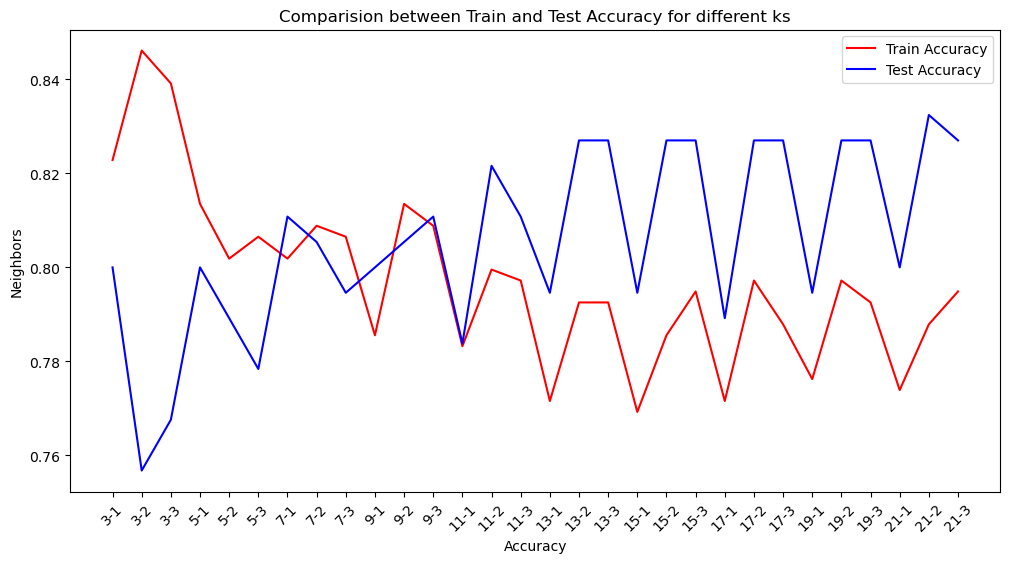

In [93]:
# Now will see at what combination we are getting better result

plt.figure(figsize=(12,6))
plt.plot(dfg, train, label='Train Accuracy', color='r')
plt.plot(dfg, test, label='Test Accuracy', color='b')
plt.title('Comparision between Train and Test Accuracy for different ks')
plt.xlabel('Accuracy')
plt.ylabel('Neighbors')
plt.legend()
plt.xticks(rotation=45)
plt.show()

* **from abvove graph , we can conclude that at k=11 and p=1, the difference between accuracies is min.**

In [94]:
# Initialising the tunned K-NN
knn2=KNeighborsClassifier(n_neighbors=11, p=1)
knn2.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [95]:
# Checking the accuracy of the model

print('Train Accuracy :', knn2.score(X_train_std, y_train))
print('Test Accuracy :', knn2.score(X_test_std, y_test))

Train Accuracy : 0.7832167832167832
Test Accuracy : 0.7837837837837838


#### Predicting Train and Test data results

In [96]:
pred_test=knn2.predict(X_test_std)
pred_train=knn2.predict(X_train_std)

#### Accuracy of K-NN Model

In [97]:
print('The Accuracy of K-NN is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of K-NN is  0.7837837837837838


#### Confusion Metrix

#### Accuracy of K-NN Model

In [98]:
print('The Accuracy of K-NN is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of K-NN is  0.7837837837837838


In [99]:
cm=metrics.confusion_matrix(y_test, pred_test)
pd.DataFrame(cm, columns=['Pred_Low','Pred_High'],
            index=['Act_Low','Act_High'])

,Pred_Low,Pred_High
Act_Low,18,33
Act_High,7,127


#### Classification Report

In [100]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.88      0.40      0.55       141
           1       0.77      0.97      0.86       288

    accuracy                           0.78       429
   macro avg       0.82      0.68      0.70       429
weighted avg       0.80      0.78      0.76       429



In [101]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.72      0.35      0.47        51
           1       0.79      0.95      0.86       134

    accuracy                           0.78       185
   macro avg       0.76      0.65      0.67       185
weighted avg       0.77      0.78      0.76       185



* **Using K-NN, the recall value is very less.**

#### ROC and AUC

In [102]:
fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)    # AUC : Area under the curve
roc_auc

0.6846926713947991

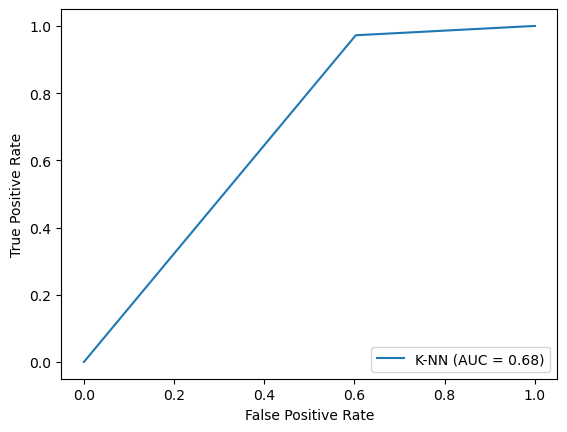

In [103]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='K-NN')
display.plot()
plt.show()

### SVM - Support Vector Machines

In [104]:
# Initialling SVM
svm1=svm.LinearSVC()
svm1.fit(X_train_std, y_train)

LinearSVC()

In [105]:
# Checking the accuracy of the model

print('Train Accuracy :', svm1.score(X_train_std, y_train))
print('Test Accuracy :', svm1.score(X_test_std, y_test))

Train Accuracy : 0.8018648018648019
Test Accuracy : 0.827027027027027


In [106]:
svm2=svm.SVC()     
svm2.fit(X_train_std,y_train)

SVC()

In [107]:
# Checking the accuracy of the model

print('Train Accuracy :', svm2.score(X_train_std, y_train))
print('Test Accuracy :', svm2.score(X_test_std, y_test))

Train Accuracy : 0.8088578088578089
Test Accuracy : 0.827027027027027


* **Hyperperameter Tuning**

In [108]:
params={'kernel':['linear','poly','rbf'],
         'degree': [2,3,4],
         'gamma': [0.1, 1, .001],
         'C': [0.01,0.1,1,10,100,150]
        }
sv=svm.SVC()
svm_rs=GridSearchCV(sv, params, cv=10, n_jobs=-1, verbose=True)
svm_rs.fit(X_train_std,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 150], 'degree': [2, 3, 4],
                         'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [109]:
svm_rs.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [110]:
svm_rs.best_score_

0.8018826135105204

In [111]:
svm_rs.best_estimator_

SVC(C=0.01, degree=2, gamma=0.1, kernel='linear')

In [112]:
sv1=svm.SVC(C=0.01, degree=2, gamma=0.1, kernel='linear')                    
sv1.fit(X_train_std, y_train)

print('Train Accuracy : ', sv1.score(X_train_std,y_train))
print('Test Accuracy : ', sv1.score(X_test_std,y_test))

Train Accuracy :  0.8018648018648019
Test Accuracy :  0.827027027027027


#### Predicting Train and Test data result

In [113]:
pred_train=sv1.predict(X_train_std)
pred_test=sv1.predict(X_test_std)

#### Accuracy of SVM Model

In [114]:
print('The Accuracy of SVM is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of SVM is  0.827027027027027


#### Classification Report

In [115]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       141
           1       0.78      0.98      0.87       288

    accuracy                           0.80       429
   macro avg       0.85      0.71      0.73       429
weighted avg       0.83      0.80      0.78       429



In [116]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



* **Using SVM, the recall value is very less.**

#### ROC and AUC

In [117]:
fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)    # AUC : Area under the curve
roc_auc

0.7076315011820331

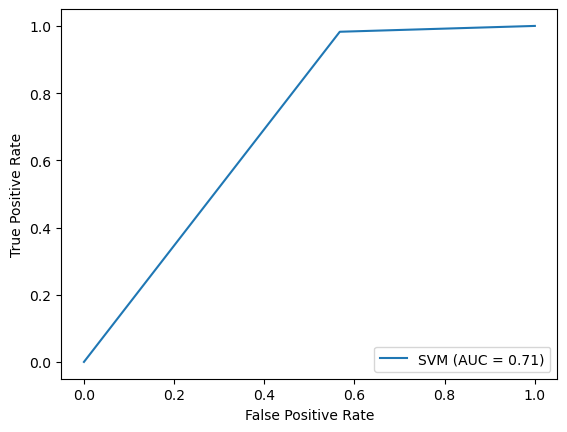

In [118]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='SVM')
display.plot()
plt.show()

### Decision Tree Algorithm

In [119]:
# Initialising Decision Tree

dt=DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [120]:
# Checking the accuracy of the model

print('Train Accuracy :', dt.score(X_train_std, y_train))
print('Test Accuracy :', dt.score(X_test_std, y_test))

Train Accuracy : 1.0
Test Accuracy : 0.6972972972972973


* **Decision Tree overfits the data. So we will tune the hyperparameters.**

#### Grid Search and Random Search

#### Gris Search : Parameter tuning

In [121]:
params={
    'criterion': ['gini','entropy'],
    'max_depth': [9,11,13,15],
    'min_samples_split': [15,20,50,100,200,250,300],
    'min_samples_leaf': [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1, verbose=2)

gd_search.fit(X_train_std, y_train)

Fitting 10 folds for each of 392 candidates, totalling 3920 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 11, 13, 15],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [15, 20, 50, 100, 200, 250, 300]},
             verbose=2)

In [122]:
gd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 250}

In [123]:
gd_search.best_score_

0.8065337763012183

In [124]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=250)

In [125]:
dt_f=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5, min_samples_split=250)
dt_f.fit(X_train_std,y_train)

print('Train Accuracy :', dt_f.score(X_train_std, y_train))
print('Test Accuracy :', dt_f.score(X_test_std, y_test))

Train Accuracy : 0.8135198135198135
Test Accuracy : 0.8162162162162162


#### Predicting the Train and Test data result

In [126]:
pred_train=dt_f.predict(X_train_std)
pred_test=dt_f.predict(X_test_std)

#### Accuracy of Decision Tree Algorithm

In [127]:
print('The Accuracy of Decision Tree is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of Decision Tree is  0.8162162162162162


#### Classification Report

In [128]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63       141
           1       0.79      0.98      0.88       288

    accuracy                           0.81       429
   macro avg       0.85      0.73      0.75       429
weighted avg       0.83      0.81      0.79       429



In [129]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.43      0.56        51
           1       0.82      0.96      0.88       134

    accuracy                           0.82       185
   macro avg       0.82      0.70      0.72       185
weighted avg       0.82      0.82      0.80       185



* **Using Decision Tree, the recall value is very less.**

#### ROC and AUC

In [130]:
fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)    # AUC : Area under the curve
roc_auc

0.7271719858156027

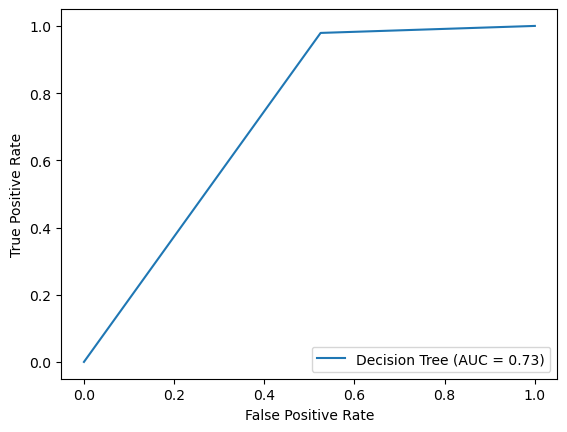

In [131]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Decision Tree')
display.plot()
plt.show()

### Random Forest

In [132]:
# Initialising the Random Forest

rf=RandomForestClassifier()
rf.fit(X_train_std,y_train)

RandomForestClassifier()

In [133]:
# Checking the accuracy of the model

print('Train Accuracy :', rf.score(X_train_std, y_train))
print('Test Accuracy :', rf.score(X_test_std, y_test))

Train Accuracy : 1.0
Test Accuracy : 0.772972972972973


* **Random Forest has overfits the data. We will tune the hyperparameters.**

In [134]:
params={'n_estimators':[100,150,200],
         'criterion': ['gini','entropy'],
         'max_depth': [9,11,13,15],
         'min_samples_split': [50,100,200],
         'min_samples_leaf': [5,10,15,20],
         'max_features':['sqrt','log2'],
         'bootstrap':[True]
        }
rf1=RandomForestClassifier()
gs_rf=GridSearchCV(estimator=rf1, param_grid=params, cv=10, n_jobs=-1, verbose=1)
gs_rf.fit(X_train_std,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 11, 13, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [50, 100, 200],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [135]:
gs_rf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [136]:
gs_rf.best_score_

0.8111849390919158

In [137]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=5,
                       min_samples_split=50)

In [138]:
rff=RandomForestClassifier(n_estimators=200, max_depth=9, max_features='log2', min_samples_leaf=5,
                       min_samples_split=50)
rff.fit(X_train_std,y_train)

print('Train Accuracy :', rff.score(X_train_std, y_train))
print('Test Accuracy :', rff.score(X_test_std, y_test))

Train Accuracy : 0.8135198135198135
Test Accuracy : 0.8216216216216217


#### Predicting Train, Test data result

In [139]:
pred_train=rff.predict(X_train_std)
pred_test=rff.predict(X_test_std)

#### Accuracy of Random Forest

In [140]:
print('The Accuracy of Random Forest is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of Random Forest is  0.8216216216216217


#### Classification Report

In [141]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62       141
           1       0.79      0.98      0.88       288

    accuracy                           0.81       429
   macro avg       0.86      0.73      0.75       429
weighted avg       0.84      0.81      0.79       429



In [142]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185



* **Using Random Forest, the recall value is very less.**

#### Classification Report

#### ROC and AUC

In [143]:
fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)    # AUC : Area under the curve
roc_auc

0.7253619976359338

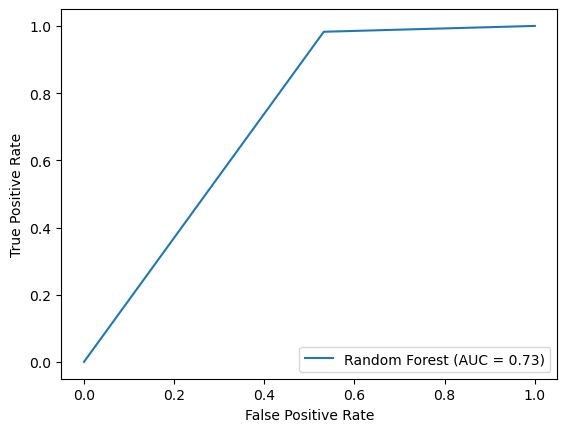

In [144]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()
plt.show()

## Results

* **The Accuracy of Logistic Regression is 82%**
    * Precision Value Of Train is 92% and Test is 88%
    * Recall Value of Train is 43% and Test is 41%
* **The Accuracy of K-Nearest Neighbour is 78%**
    * Precision Value Of Train is 88% and Test is 72%
    * Recall Value of Train is 40% and Test is 35%
* **The Accuracy of Support Vector Machine is 82%**
    * Precision Value Of Train is 92% and Test is 91%
    * Recall Value of Train is 43 %and Test is 41%
* **The Accuracy of Decision Tree is 81%**
    * Precision Value Of Train is 92% and Test is 81%
    * Recall Value of Train is 48% and Test is 43%
* **The Accuracy of Random Forest is 82%**
    * Precision Value Of Train is 93% and Test is 88%
    * Recall Value of Train is 48% and Test is 41%